# Vision Transformer On Sample Images

In [97]:
# Packages
from PIL import Image
from torch import nn
import torchvision.models as models
from torchvision import transforms
#from torchsummary import summary
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Load Images

Non-blurred

In [98]:
sample_images = [Image.open('../../../Images/single class samples/No Blur/' + img_path) for img_path in os.listdir('../../../Images/single class samples/No Blur')]
# for img in sample_images:
#     plt.imshow(img)
#     plt.show()

## List Models

In [99]:
models.list_models()

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcn_resnet101',
 'fcn_resnet50',
 'fcos_resnet50_fpn',
 'googlenet',
 'inception_v3',
 'keypointrcnn_resnet50_fpn',
 'lraspp_mobilenet_v3_large',
 'maskrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn_v2',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'quantized_googlenet',
 '

## Load Model

In [100]:
vision_transformer = models.vit_h_14(weights='IMAGENET1K_SWAG_LINEAR_V1')

## Get all items except for last layer

In [101]:
# get layers between certain indices
def slice_model(original_model, from_layer=None, to_layer=None):
    return nn.Sequential(*list(original_model.children())[from_layer:to_layer])

# get all layers except the last one
model_vit_feature = slice_model(vision_transformer, to_layer=-1).to('cpu')
# print summary of layers
#print(vision_transformer)
print(model_vit_feature)

Sequential(
  (0): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14))
  (1): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=1280, out_features=1280, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=1280, out_features=5120, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=5120, out_features=1280, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (self_attention): Mu

## Preprocess Images

In [102]:
# pre-processing required by Vision Transformer
# From the documentation:
# The inference transforms are available at ViT_H_14_Weights.IMAGENET1K_SWAG_LINEAR_V1.transforms and perform the following preprocessing operations: Accepts PIL.Image, batched (B, C, H, W) and single (C, H, W) image torch.Tensor objects. The images are resized to resize_size=[224] using interpolation=InterpolationMode.BICUBIC, followed by a central crop of crop_size=[224]. Finally the values are first rescaled to [0.0, 1.0] and then normalized using mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225].
preprocess = models.ViT_H_14_Weights.IMAGENET1K_SWAG_LINEAR_V1.transforms()
preprocessed_images = [preprocess(sample_img) for sample_img in sample_images]
print(sample_images[0].size)
print(preprocessed_images[0].shape)

(256, 256)
torch.Size([3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


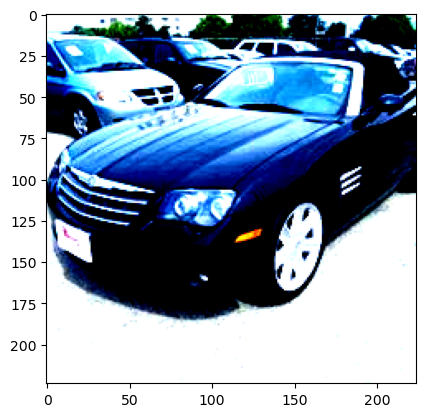

In [103]:
plt.imshow(preprocessed_images[0].permute(1, 2, 0))

In [104]:
# Inspect the first layer
first_layer = model_vit_feature[0]
print(f'Expected input channels: {first_layer.in_channels}')

Expected input channels: 3


In [105]:
model_vit_feature.eval()
print(model_vit_feature(preprocessed_images[0].unsqueeze(0)))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\ijyli\anaconda3\envs\computervision\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ijyli\AppData\Local\Temp\ipykernel_20248\230526071.py", line 2, in <module>
    print(model_vit_feature(preprocessed_images[0].unsqueeze(0)))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ijyli\anaconda3\envs\computervision\Lib\site-packages\torch\nn\modules\module.py", line 1501, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ijyli\anaconda3\envs\computervision\Lib\site-packages\torch\nn\modules\container.py", line 217, in forward
    input = module(input)
            ^^^^^^^^^^^^^
  File "c:\Users\ijyli\anaconda3\envs\computervision\Lib\site-packages\torch\nn\modules\module.py", line 1501, in _call_impl
    return forward_call(*args, **kwargs)
         

In [107]:
batch_size, seq_length, H, W = preprocessed_images[0].unsqueeze(0).size()
print(batch_size)
print(seq_length)
print(H)
print(W)
flattened_input = preprocessed_images[0].unsqueeze(0).view(batch_size, seq_length, -1)  # Shape: [1, 1280, 256]
print(flattened_input.shape)


1
3
224
224
torch.Size([1, 3, 50176])


## Extract Embeddings

In [ ]:
# put the model in evaluation mode 
model_vit_feature.eval()
#print(model_vit_feature)

# extract the embeddings for the three images
embeddings = [model_vit_feature(img.unsqueeze(0).to('cpu')).squeeze() for img in preprocessed_images]

# print the shape of the first embedding
print(embeddings[0].shape)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\ijyli\anaconda3\envs\computervision\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ijyli\AppData\Local\Temp\ipykernel_20248\64453608.py", line 6, in <module>
    embeddings = [model_vit_feature(img.unsqueeze(0)).squeeze() for img in preprocessed_images]
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ijyli\AppData\Local\Temp\ipykernel_20248\64453608.py", line 6, in <listcomp>
    embeddings = [model_vit_feature(img.unsqueeze(0)).squeeze() for img in preprocessed_images]
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ijyli\anaconda3\envs\computervision\Lib\site-packages\torch\nn\modules\module.py", line 1501, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ijyli\anaconda3\envs\computerv